In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
dpr_df = pd.read_csv('data/processed_data/DPR.csv')
idea_df = pd.read_csv('data/processed_data/IDEA_by_district.csv')
district_data = pd.read_csv('data/processed_data/ohio_ppe_by_district.csv')

# Get only ohio idea_data
OHIO_STATE_CODE = 39
idea_df = idea_df[idea_df['LEAID'].astype('string').str[:2] == str(OHIO_STATE_CODE)]

In [3]:
# Merge the DPR, district and IDEA data into one dataset
df = pd.merge(idea_df, dpr_df, on='LEAID', how='inner')
df = pd.merge(df, district_data, on='LEAID', how='inner')

In [27]:
df['percent_disability'] = df['% of Students with Disabilities FY22']

corr_relevant_cols = ['percent_disability', 'District Pupil Density FY22', '% of Economically Disadvantaged Students FY22', 'Classroom Teachers\' Average Salary FY22', '% Teachers with 0-4 Years Experience FY22', '% Teachers with 10+ Years Experience FY22', 'Ohio Median Income TY20',
                       'Federal Average Income TY20', 'School District Income Tax Per Pupil FY22', 'Total Operating Expenditure Per Pupil FY22', 'Administrator Expenditure Per Pupil FY22', 'Pupil Support Expenditure Per Pupil FY22', 'Local Tax Effort Index FY22']

In [36]:
num_df = df[corr_relevant_cols]

def format_cols(column):
    if column.dtype == 'float64':
        return column
    if column.dtype == 'string' or column.dtype == 'object':
        return column.str.replace(',', '').astype('float64')
    
    return column.astype('float64')

num_df = num_df.apply(format_cols)

num_df.dtypes

corr_matrix = num_df.corr()

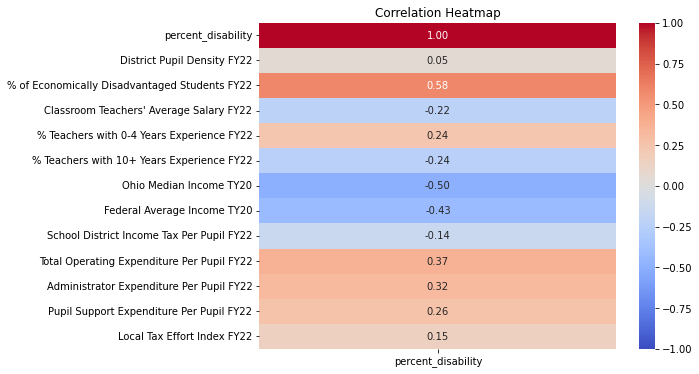

In [37]:
m = corr_matrix[['percent_disability']]

plt.figure(figsize=(8, 6))
sns.heatmap(m, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [34]:
# Testing for correlation statistical significance
ALPHA = 0.0002

for col in corr_relevant_cols:
    corr_coef, p_value = pearsonr(num_df['percent_disability'], num_df[str(col)])
    if p_value < ALPHA and col != 'percent_disability':
        print('percent_disability and ' + col + ' have a correlation that is statistically significant.')

percent_disability and % of Economically Disadvantaged Students FY22 have a correlation that is statistically significant.
percent_disability and Classroom Teachers' Average Salary FY22 have a correlation that is statistically significant.
percent_disability and % Teachers with 0-4 Years Experience FY22 have a correlation that is statistically significant.
percent_disability and % Teachers with 10+ Years Experience FY22 have a correlation that is statistically significant.
percent_disability and Ohio Median Income TY20 have a correlation that is statistically significant.
percent_disability and Federal Average Income TY20 have a correlation that is statistically significant.
percent_disability and Total Operating Expenditure Per Pupil FY22 have a correlation that is statistically significant.
percent_disability and Administrator Expenditure Per Pupil FY22 have a correlation that is statistically significant.
percent_disability and Pupil Support Expenditure Per Pupil FY22 have a correla

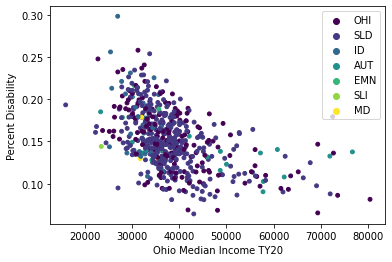

In [9]:
cmap = plt.cm.get_cmap('viridis', len(df['MOST_COMMON_DISABILITY'].unique()))
colors = dict()
for i, dis in enumerate(df['MOST_COMMON_DISABILITY'].unique()):
    colors[dis] = cmap.colors[i];

# Map classes to colors using the colormap
class_colors = [colors[cls] for cls in df['MOST_COMMON_DISABILITY']]

for cls, color in colors.items():
    plt.scatter([], [], color=color, label=cls)  # Create dummy scatter plot for legend

plt.legend()

plt.scatter(x=num_df['Ohio Median Income TY20'], y=num_df['percent_disability'], s=15, c=class_colors, cmap=plt.cm.Pastel1.colors)
plt.xlabel('Ohio Median Income TY20')
plt.ylabel('Percent Disability')
plt.legend()
plt.show()

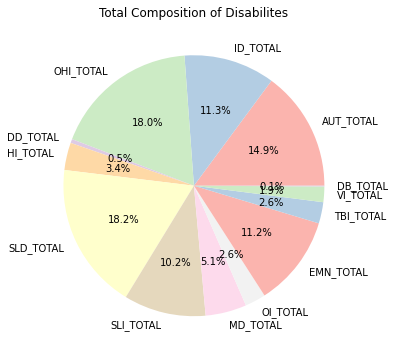

In [10]:
total_columns = df.filter(regex='_TOTAL')

fig = plt.figure(figsize=(8, 6))
plt.pie(total_columns.sum(), labels=total_columns.columns, autopct='%1.1f%%', colors = plt.cm.Pastel1.colors)
plt.title("Total Composition of Disabilites")
fig.set_facecolor('white')
plt.show()

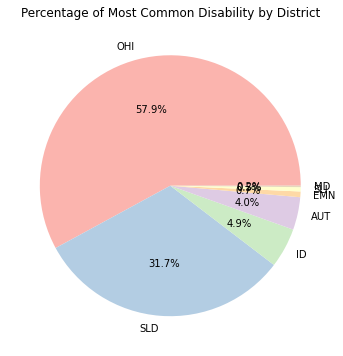

In [11]:
fig = plt.figure(figsize=(8, 6))
plt.pie(df['MOST_COMMON_DISABILITY'].value_counts(), labels=df['MOST_COMMON_DISABILITY'].unique(), autopct='%1.1f%%', colors = plt.cm.Pastel1.colors)
plt.title("Percentage of Most Common Disability by District")
fig.set_facecolor('white')
plt.show()